**Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data**

In [2]:
# Data Source Files
fraud_data_path=r"C:\Users\hp\Kifiya Projects\Adey_Innov_FraudDetection\data\raw\Fraud_Data.csv"
creditcard_data_path=r"C:\Users\hp\Kifiya Projects\Adey_Innov_FraudDetection\data\raw\creditcard.csv"
ipaddress_data_path=r"C:\Users\hp\Kifiya Projects\Adey_Innov_FraudDetection\data\raw\IpAddress_to_Country.csv"
# retriving data from source path
fraud_data_raw=pd.read_csv(fraud_data_path)
creditcard_data_raw=pd.read_csv(creditcard_data_path)
ipaddres_data_raw=pd.read_csv(ipaddress_data_path)

In [3]:
print("Credit Card Data")
print(creditcard_data_raw.describe())
print("Fraud Data")
print(fraud_data_raw.head())
print("IpAddress Data")
ipaddres_data_raw.head()

Credit Card Data
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.33

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [4]:
#Converting Dates to Datatime 
fraud_data_raw['signup_time']=pd.to_datetime(fraud_data_raw['signup_time'])
fraud_data_raw['purchase_time']=pd.to_datetime(fraud_data_raw['purchase_time'])

In [5]:
#Checking for Missing Values
Missing_values_Fraud_df=fraud_data_raw.isnull().sum()
Missing_values_Credit_df=creditcard_data_raw.isnull().sum()
print('ecommerce transaction')
print(Missing_values_Credit_df)
print('creditcard transaction')
print(Missing_values_Fraud_df)

ecommerce transaction
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
creditcard transaction
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [6]:
#Checking for Duplicates and removal
num_duplicates=fraud_data_raw.duplicated().sum()
print(f"{num_duplicates} is found in Ecommerce transaction df")
num_duplicates_credit=creditcard_data_raw.duplicated().sum()
print(f"{num_duplicates_credit} is found in CreditCard  transaction df")
creditcard_data_raw=creditcard_data_raw.drop_duplicates() # removed all duplicated
print(f"removed all duplicated from creditcard transaction set and reassigned the cleaned set")

0 is found in Ecommerce transaction df
1081 is found in CreditCard  transaction df
removed all duplicated from creditcard transaction set and reassigned the cleaned set


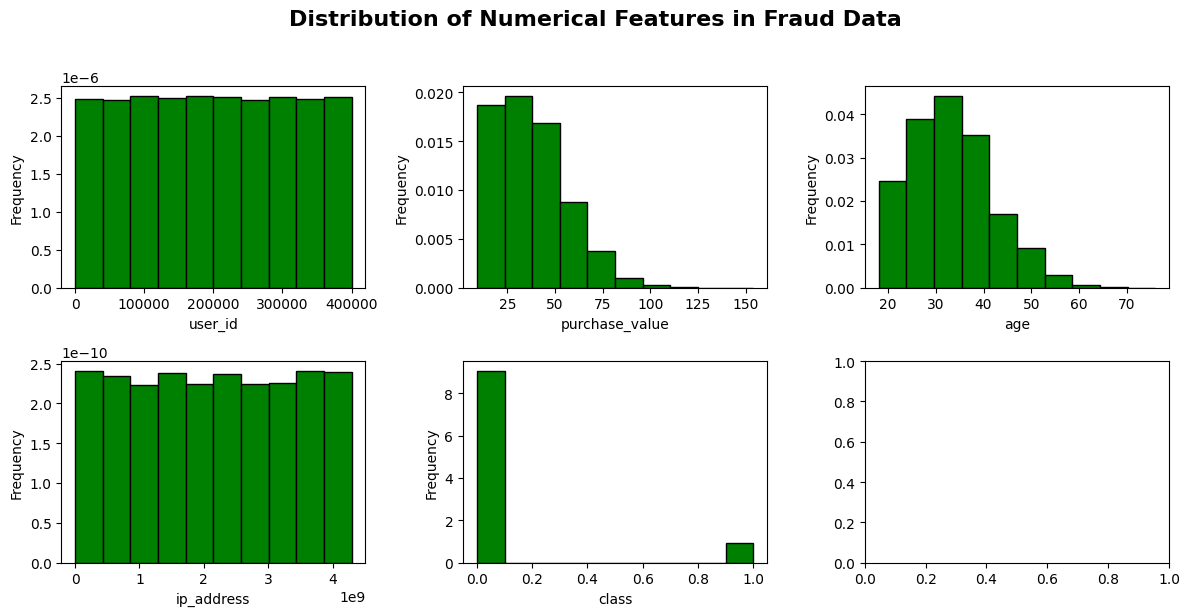

In [7]:
# Univariant analysis
#Numerical Values
numerical_columns=fraud_data_raw.select_dtypes('number')
nrows=2
ncols=3
fig, axes= plt.subplots(nrows, ncols, figsize=(12,6))
axes=axes.flatten()
for i, cols in enumerate(numerical_columns):
    axes[i].hist(fraud_data_raw[cols],color='green',edgecolor='black',density=True)
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel('Frequency')
fig.suptitle('Distribution of Numerical Features in Fraud Data', fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()


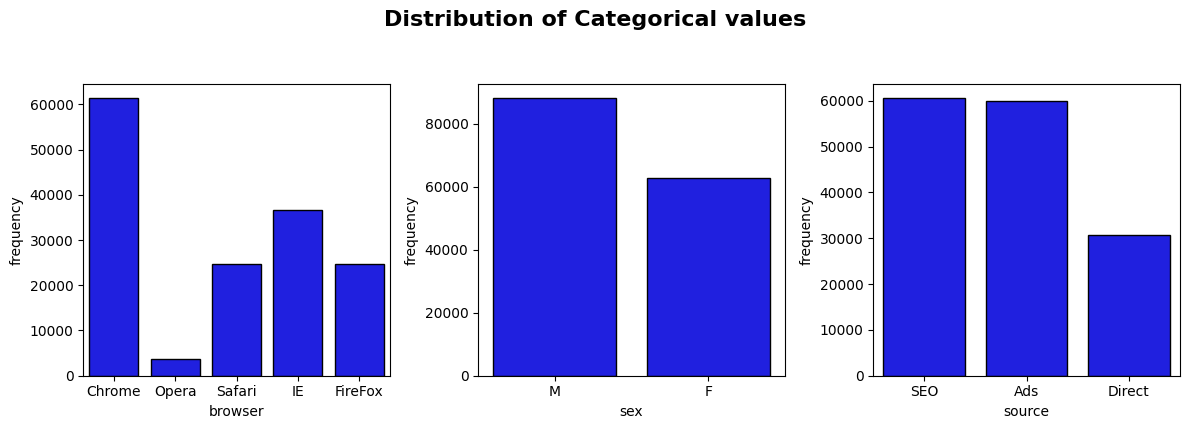

In [8]:
#Categorical univariant analysis
categorical_columns=['browser','sex','source']
nrows=1
ncols=3
fig,axes=plt.subplots(nrows,ncols,figsize=(12,4))
axes=axes.flatten()
for i,cols in enumerate(categorical_columns):
    ax=axes[i]
    sns.countplot(data=fraud_data_raw,x=cols,ax=ax,color='Blue',edgecolor='black')
    ax.set_xlabel(cols)
    ax.set_ylabel('frequency')
fig.suptitle('Distribution of Categorical values', fontsize=16,fontweight='bold', y=1.06)

plt.tight_layout()
plt.show()

**Merging**

In [9]:
ipaddres_data_raw['lower_bound_ip_address'] = ipaddres_data_raw['lower_bound_ip_address'].astype(int)
ipaddres_data_raw['upper_bound_ip_address'] = ipaddres_data_raw['upper_bound_ip_address'].astype(int)
fraud_data_raw['ip_address']=fraud_data_raw['ip_address'].astype(int)


In [ ]:

fraud_data_raw.sort_values('ip_address', inplace=True)
ipaddres_data_raw.sort_values('lower_bound_ip_address', inplace=True)

# Now, perform the merge_asof
merged_data = pd.merge_asof(
    fraud_data_raw,
    ipaddres_data_raw[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']],
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='forward')

# Filter to ensure the IP is within the range
final_merged_data = merged_data[merged_data['ip_address'] <= merged_data['upper_bound_ip_address']]

print("First 5 rows of the successfully merged and filtered data:")
print(final_merged_data.head())

First 5 rows of the successfully merged and filtered data:
   user_id         signup_time       purchase_time  purchase_value  \
0    62421 2015-02-16 00:17:05 2015-03-08 10:00:39              46   
1   173212 2015-03-08 04:03:22 2015-03-20 17:23:45              33   
2   242286 2015-05-17 16:45:54 2015-05-26 08:54:34              33   
3   370003 2015-03-03 19:58:39 2015-05-28 21:09:13              33   
4   119824 2015-03-20 00:31:27 2015-04-05 07:31:46              55   

       device_id  source  browser sex  age  ip_address  class  \
0  ZCLZTAJPCRAQX  Direct   Safari   M   36       52093      0   
1  YFGYOALADBHLT     Ads       IE   F   30       93447      0   
2  QZNVQTUITFTHH  Direct  FireFox   F   32      105818      0   
3  PIBUQMBIELMMG     Ads       IE   M   40      117566      0   
4  WFIIFCPIOGMHT     Ads   Safari   M   38      131423      0   

   lower_bound_ip_address  upper_bound_ip_address    country  
0              16777216.0              16777471.0  Australia  
1  

In [15]:
fraud_data_raw.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
class                      int64
dtype: object

In [13]:
# Convert time columns to datetime objects
fraud_data_raw['signup_time'] = pd.to_datetime(fraud_data_raw['signup_time'])
fraud_data_raw['purchase_time'] = pd.to_datetime(fraud_data_raw['purchase_time'])

df = fraud_data_raw.sort_values(by=['user_id', 'purchase_time'])

# Time since signup in hours
df['time_since_signup_hours'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600

# Hour of day and day of week
df['hour_of_day'] = df['purchase_time'].dt.hour
df['day_of_week'] = df['purchase_time'].dt.dayofweek


df['transaction_count_24h'] = df.groupby('user_id')['purchase_time'].transform(lambda x: x.diff().dt.total_seconds().gt(0).cumsum())


df['ip_transaction_count'] = df.groupby('ip_address')['ip_address'].transform('count')

# For real-world IP geocoding, you'd use a library like 'geopy' or a free API
# Example: df['country'] = df['ip_address'].apply(lambda x: get_country_from_ip(x))

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df.drop(columns=['class'])
y = df['class']

# 2. Correctly identify feature types
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

# 3. Create your train/test split from the full dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Perform One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_train_encoded_sparse = encoder.fit_transform(X_train[categorical_features])
X_test_encoded_sparse = encoder.transform(X_test[categorical_features])

# 5. Perform Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# 6. Combine the data
from scipy.sparse import hstack
X_train_processed = hstack([X_train_scaled, X_train_encoded_sparse])
X_test_processed = hstack([X_test_scaled, X_test_encoded_sparse])


# Example check of the final shape
print("Shape of final training data (sparse matrix):", X_train_processed.shape)
print("Shape of final test data (sparse matrix):", X_test_processed.shape)

Shape of final training data (sparse matrix): (120889, 352914)
Shape of final test data (sparse matrix): (30223, 352914)
